In [1]:
#rope
#http://graphics.cs.cmu.edu/nsp/course/15-869/2006/papers/jakobsen.htm

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
#np.random.seed(19680801)



In [3]:
n_segments=50
total_len=10.0
restlength=total_len/n_segments
t_step=0.02
gravity=np.array([0,0.0,0.0])


In [4]:
def init():
    global m_x,m_oldx,m_a
    m_x=np.vstack((np.linspace(0,total_len,n_segments+1),np.zeros(n_segments+1),np.zeros(n_segments+1))).T
    m_oldx=m_x.copy()
    m_a=np.zeros((n_segments+1,3))    
#for testing
#data=[m_x+np.array([0,0,i]) for i in range(iters)]
#data[0][0,:]
init()

In [5]:
dd=m_x[3,:]-m_x[2,:]
dd*dd


array([ 0.04,  0.  ,  0.  ])

In [6]:
def varlet(start,end,rand_disp=0.003,damping_coeff=0.98):
    global m_x,m_oldx
    x_diff=m_x-m_oldx
    #print('---',x_diff)
    m_oldx=m_x.copy()
    #m_x+=x_diff+m_a*t_step**2
    #const FVector NewPosition = Particle.Position + Vel + (SubstepTimeSqr * ParticleForce);
    #m_x+=x_diff+gravity*t_step**2
    
    #dampnenning forces
    x_diff=x_diff*damping_coeff
    
    m_x+=x_diff#*0.02
    
    #rnadom small forces
    m_x+=(np.random.random(m_x.shape)-0.5)*rand_disp
    
    m_x[0,:]=start
    m_x[-1,:]=end    
    

In [7]:
def SatisfyConstraints(start,end,contrain_iters=10):
    for it in range(contrain_iters):
        for vert in range(n_segments):
            delta=m_x[vert+1,:]-m_x[vert,:]
            deltalength=np.sqrt((delta*delta).sum())
            #print(vert,delta,deltalength)
            cng=(deltalength-restlength)/deltalength
            if vert==0:
                m_x[1,:]-=delta*cng
            elif vert==n_segments:
                m_x[vert,:] += delta*cng
            else:
                m_x[vert,:] += delta*0.5*cng
                m_x[vert+1,:] -= delta*0.5*cng
        #m_x[0,:]=start
        #m_x[-1,:]=end    
    #print('---',m_x)


In [8]:
init()
class CabelEdge(object):
    def __init__(self,start=[0,0,0]):
        self.cutrrent_pos=np.array(start,np.float64)
        self.dest=np.array([3,3,2])
        self.iters=30.0
        self.step=(self.dest-self.cutrrent_pos)/self.iters
        
    def __next__(self):
        #if 15>self.iters>0:
        #    self.cutrrent_pos+=self.step
        if self.iters>0:
            self.cutrrent_pos+=self.step
        self.iters-=1

def run_iters(iters=800,rand_disp=0.003,damping_coeff=0.98,contrain_iters=10):
    data=[]
    start=CabelEdge(m_x[0,:])
    end=m_x[-1,:].copy()

    for it in range(iters):
        #print('-1-',m_x)
        varlet(start.cutrrent_pos,end,rand_disp,damping_coeff)
        #print('-2-',m_x)
        SatisfyConstraints(start.cutrrent_pos,end,contrain_iters)
        #print('-3-',m_x)
        data.append(m_x.copy())
        next(start)
    return data

data=run_iters(rand_disp=0.003,damping_coeff=0.98)

<IPython.core.display.Javascript object>


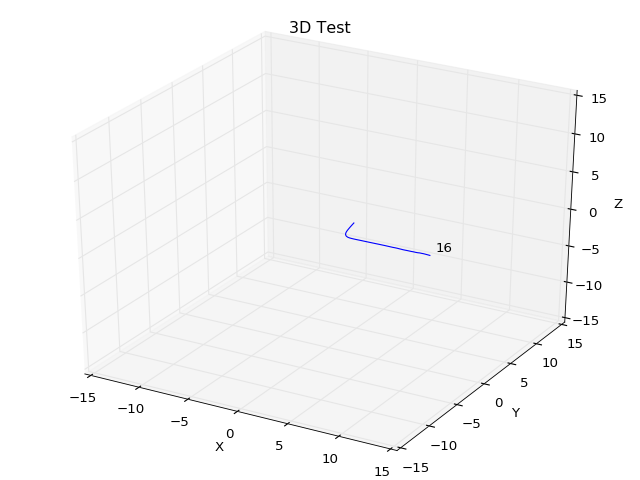

In [18]:
matrix
def update_lines(num, dataLines, lines, txt):
    #for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
    #    line.set_data(data[0:2, :num])
    #    line.set_3d_properties(data[2, :num])
    #print('kkk')
    lines[0].set_xdata(dataLines[num][:,0])
    lines[0].set_ydata(dataLines[num][:,1])
    lines[0].set_3d_properties(dataLines[num][:, 2])
    txt.set_text('%d'%num)
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
#data = [Gen_RandLine(25, 3) for index in range(50)]
first_line=data[0]
# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(first_line[:,0],first_line[:,1], first_line[:,2])[0]]

# Setting the axes properties
ax.set_xlim3d([-15, 15.0])
ax.set_xlabel('X')

ax.set_ylim3d([-15, 15.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-15, 15.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')
txt=ax.text(10,1,0,'aaa')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, iters, fargs=(data, lines, txt),
                                   interval=100, blit=True)

plt.show()

<IPython.core.display.Javascript object>


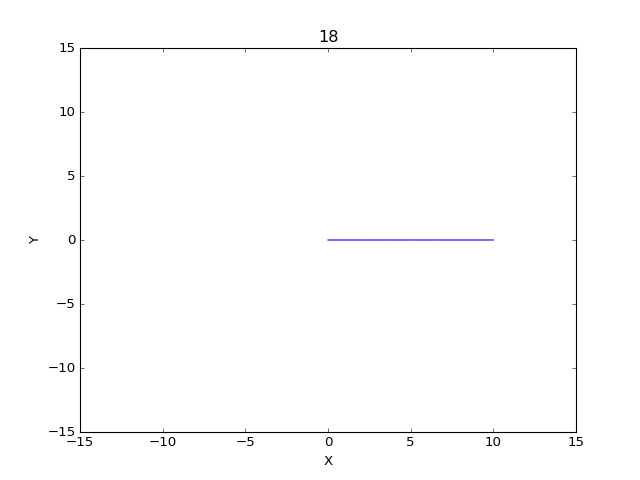

In [12]:
def update_lines(num, dataLines, lines, ax):
    lines[0].set_xdata(dataLines[num][:,0])
    lines[0].set_ydata(dataLines[num][:,1])
    ax.set_title('%d'%num)
    #return lines

fig = plt.figure()
ax = plt.subplot(1,1,1)
first_line=data[0]
lines = [ax.plot(first_line[:,0],first_line[:,1])[0]]

ax.set_xlim([-15, 15.0])
ax.set_xlabel('X')

ax.set_ylim([-15, 15.0])
ax.set_ylabel('Y')

ax.set_title('2D Test')
line_ani = animation.FuncAnimation(fig, update_lines, len(data), fargs=(data, lines, ax),
                                   interval=150, blit=True)

plt.show()

<IPython.core.display.Javascript object>


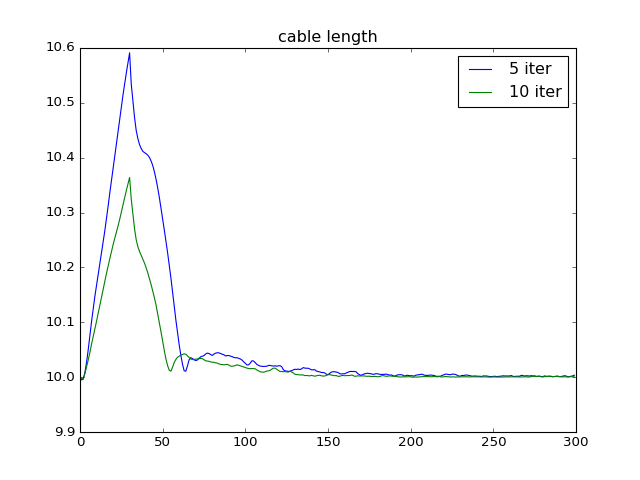

In [37]:
fig = plt.figure()
init()
data10=run_iters(iters=300,rand_disp=0.003,damping_coeff=0.98,contrain_iters=10)
init()
data5=run_iters(iters=300,rand_disp=0.003,damping_coeff=0.98,contrain_iters=5)
ax=plt.subplot(1,1,1)
ax.set_title('cable length')
plt.plot([np.linalg.norm(np.diff(d,axis=0),axis=1).sum() for d in data5])
plt.plot([np.linalg.norm(np.diff(d,axis=0),axis=1).sum() for d in data10])
plt.legend(['5 iter','10 iter'])
plt.show()

#np.diff(data[0],axis=0)
#np.linalg.norm(data[0].sum(axis=0))

<IPython.core.display.Javascript object>


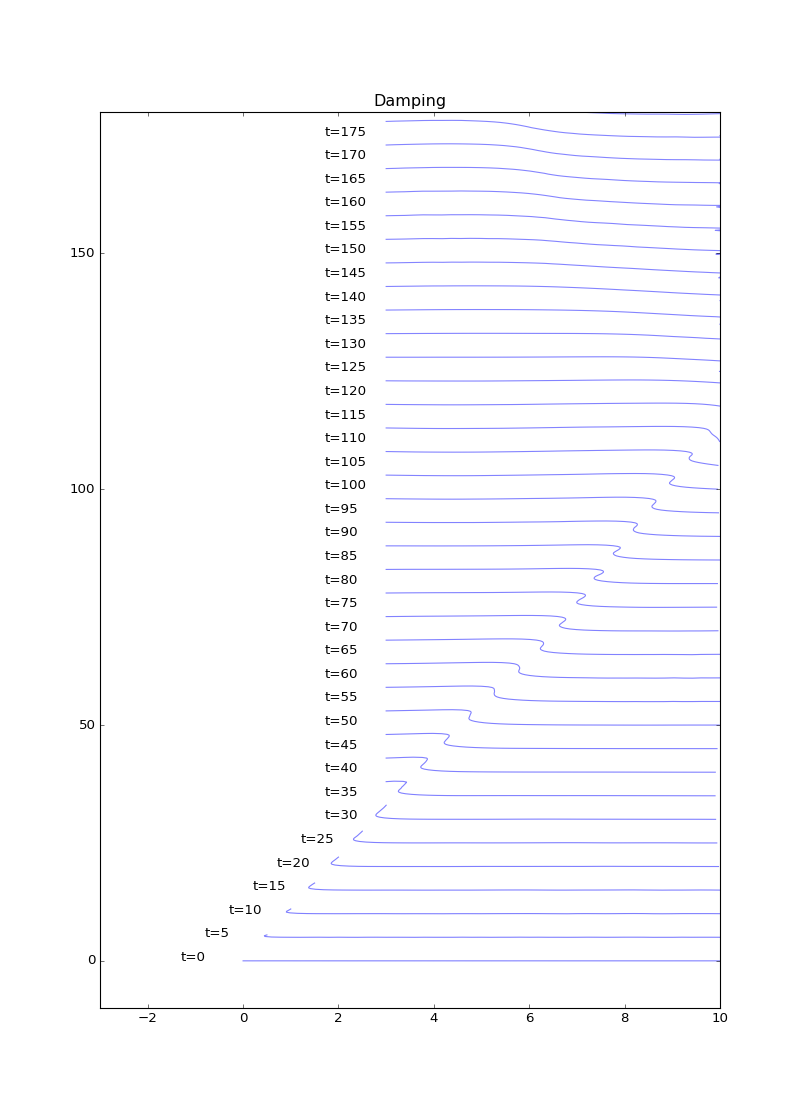

In [16]:
#m_x
init()
data=run_iters(rand_disp=0.003,damping_coeff=0.98,contrain_iters=10)

fig = plt.figure(figsize=(10,14))
ax=plt.subplot(1,1,1)
ax.set_title('Damping')
#ax.axis('equal')
plt.xlim(-3,10)
ylim=180
plt.ylim(-10,ylim)
for c,l in enumerate(data[::5]):
    plt.plot(l[:,0],l[:,1]+c*5,'-b',alpha=(0.5-c/len(data)/2+0.0))
    if c*5<ylim:
        plt.text(-1.3+l[0,0],c*5,'t=%d'%(c*5))
plt.show()



<IPython.core.display.Javascript object>


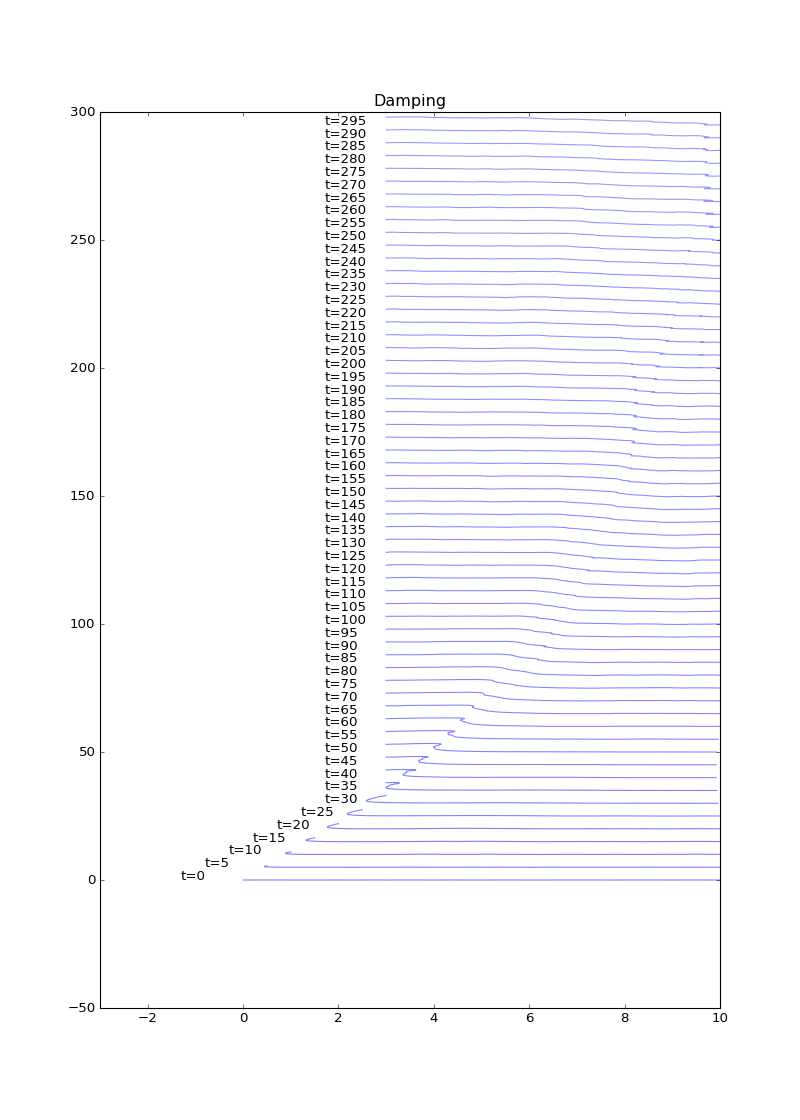

In [33]:
init()
data1=run_iters(iters=140,rand_disp=0.01,damping_coeff=0.98,contrain_iters=5)
#init()
#data2=run_iters(iters=140,rand_disp=0.003,damping_coeff=0.9,contrain_iters=5)
fig = plt.figure(figsize=(10,14))
ax=plt.subplot(1,1,1)
ax.set_title('Damping')
#ax.axis('equal')
plt.xlim(-3,10)
#ylim=180
#plt.ylim(-10,ylim)
for c,l in enumerate(data1[::5]):
    plt.plot(l[:,0],l[:,1]+c*5,'-b',alpha=(0.5-c/len(data1)/2+0.0))
    plt.text(-1.3+l[0,0],c*5,'t=%d'%(c*5))
#for c,l in enumerate(data2[::5]):
#    plt.plot(l[:,0],l[:,1]+c*5,'-r',alpha=(0.5-c/len(data2)/2+0.0))
plt.show()


<IPython.core.display.Javascript object>


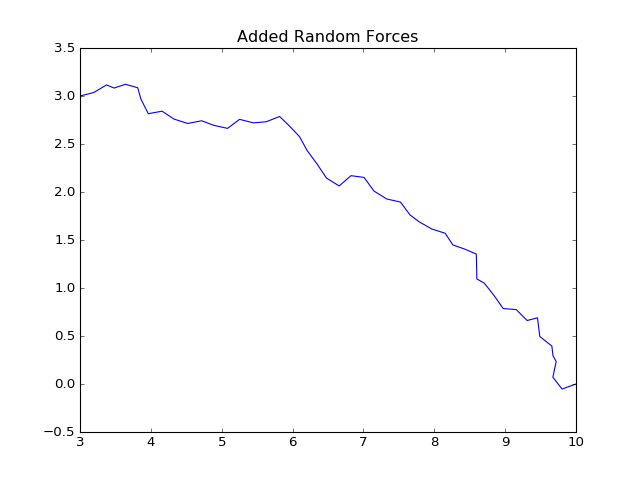

In [34]:
#m_x
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.set_title('Added Random Forces')
#ax.axis('equal')
l=data1[-1]
plt.plot(l[:,0],l[:,1],'-b')
plt.show()
